In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Mall customer data**
- It has four columns having CustomerID, Gender , Age, Income and Spending score
- Spending score between 1 to 100
- More spending score means more valuable customer
- Income and Spending score are the important variables
- Group the data based on Income and Spending score

In [3]:
data=pd.read_csv(r"C:\Users\anilg\Ds naresh it\ML\Mall_Customers - Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# select only income and spending score columns
# m-1: Select by using column names
# m-2: Select by using iloc
# M-3: by droping unwanted columns
X=data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

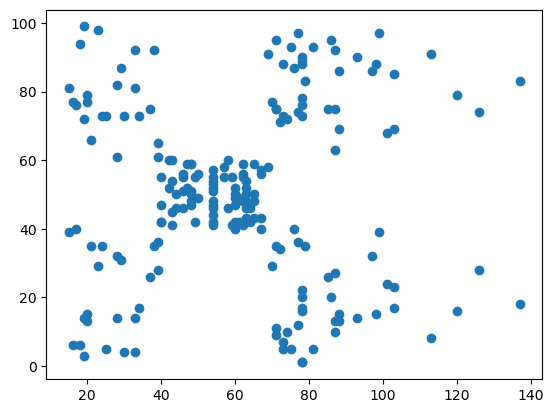

In [6]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.show()

In [7]:
# We need to decide the number of clusters
# Elbow method
# within cluster sum of squares(Wcss)
# we randomly gives 10 clusters,for each cluster will calculate

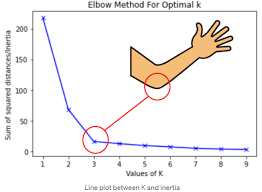

**first we check for one cluster to understand within sum of squares**

In [46]:
from sklearn.cluster import KMeans

In [47]:
### just applying one cluster
### base model

In [48]:
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1

KMeans(n_clusters=1, random_state=1234)

In [11]:
# n_clusters = no of cluster to choose
# max_iter = the distance calculations
# random_state= picking a rondom observations

In [12]:
kmeans_1.fit(X)

KMeans(n_clusters=1, random_state=1234)

**𝐼𝑛𝑡𝑒𝑟𝑡𝑖𝑎:**
- measures how well a dataset was clustered by K-Means.
- It is calculated by measuring the distance between each data point and its centroid, squaring this distance,
- and summing these squares across one cluster
- Interita also called as **Within Cluster sum of squares(WCSS)**
- Choose the clusters find the distance between each data point to the cluster centroid
- Add all the distances is nothing but WCSS

In [13]:
kmeans_1.inertia_  # variance

269981.28

In [14]:
kmeans_1.cluster_centers_

array([[60.56, 50.2 ]])

**Try to identify optimal clusters using elbow method**

In [51]:
wss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans.fit(X)
    wss.append(round(kmeans.inertia_,2))
wss
# If you are increase more clusters
# data points will be divided across the clusters

[269981.28,
 181363.6,
 106348.37,
 73679.79,
 44448.46,
 37233.81,
 30241.34,
 25062.43,
 21830.04,
 19786.85,
 17515.87,
 16036.88,
 14320.92,
 13078.42,
 11868.71,
 10929.42,
 10069.84,
 9433.11,
 8768.73,
 8154.66]

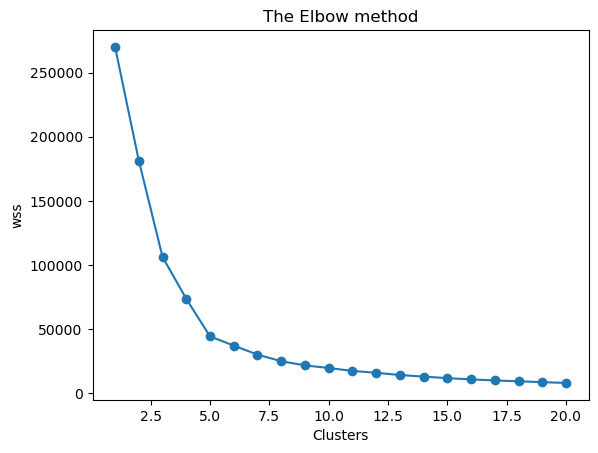

In [50]:
plt.scatter(range(1,21),wss)
plt.plot(range(1,21),wss)
plt.title("The Elbow method")
plt.xlabel("Clusters")
plt.ylabel("wss")
plt.show()

In [17]:
# if you are increase more clusters
# data points will be divided across the clusters

**using elbow method we decided number of cluster are 5**

In [18]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters=kmeans.fit_predict(X)  # which data point belongs to which cluster
y_clusters

# here 0=cluster_1 and 4=cluster_5
# python index start with zero
# y_clusters will give that
# we have 200 data points in x
# x[:3]
# income                spending score                          cluster
#  15                       39                                    0
#  15                       81                                    3
#  16                        6                                    0

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [19]:
data['Cluster_group']=y_clusters

In [20]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [21]:
data['Cluster_group'].value_counts()

Cluster_group
4    81
1    39
3    35
0    23
2    22
Name: count, dtype: int64

In [22]:
# 200 data points
# cluster =0 ,23
# i want to retrive only 23 data point
data[data['Cluster_group']==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0
16,17,Female,35,21,35,0
18,19,Male,52,23,29,0


In [23]:
# group the data points
# we calculate mean of each cluster data points
cs_1=data[data['Cluster_group']==0].iloc[:,[3,4]]
cs_2=data[data['Cluster_group']==1].iloc[:,[3,4]]
cs_3=data[data['Cluster_group']==2].iloc[:,[3,4]]
cs_4=data[data['Cluster_group']==3].iloc[:,[3,4]]
cs_5=data[data['Cluster_group']==4].iloc[:,[3,4]]
d1={'Cluster_1':cs_1.mean(),
   'Cluster_2':cs_2.mean(),
   'Cluster_3':cs_3.mean(),
   'Cluster_4':cs_4.mean(),
   'Cluster_5':cs_5.mean()}
pd.DataFrame(d1)

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
Annual Income (k$),26.304348,86.538462,25.727273,88.200000,55.296296
Spending Score (1-100),20.913043,82.128205,79.363636,17.114286,49.518519


- we read the data
- we selected specific columns
- we given randomly 10 clusters
- we calculated the inertia of 10 clusters
- by using elbow method, we decided 5 clusters are enough
- we pass the 5 clusters to the k-means
- we pass the data (X) and the get cluster values for all observations
- we divided into 5 data frames w.r.t the cluster observations
- we calculated average income and average spending score of each observation

In [24]:
# we need to perform scatter plot: Annual income vs spending score
# But not all the data points
# we need provide by cluster wise
# X is data of two columns
X[:,0] # first columns
X[:,1] # second columns

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [25]:
X[y_clusters==0]

array([[15, 39],
       [16,  6],
       [17, 40],
       [18,  6],
       [19,  3],
       [19, 14],
       [20, 15],
       [20, 13],
       [21, 35],
       [23, 29],
       [24, 35],
       [25,  5],
       [28, 14],
       [28, 32],
       [29, 31],
       [30,  4],
       [33,  4],
       [33, 14],
       [34, 17],
       [37, 26],
       [38, 35],
       [39, 36],
       [39, 28]], dtype=int64)

In [26]:
X[y_clusters==0,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

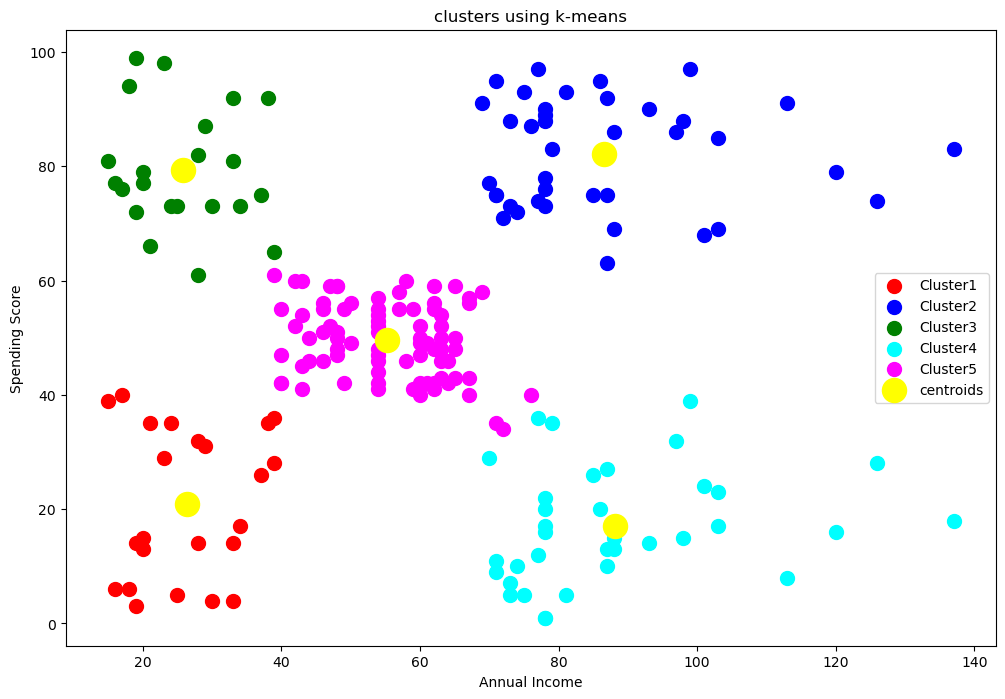

In [27]:
# Visualize the clusters
# we are applying scatter plot between income and spending score w,r,t to clusters

plt.figure(figsize=(12,8))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=100,c='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title("clusters using k-means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

**silhouette score**

ss will give the idea,the corresponding data point belongs to suitable cluster or not suposse we divided data points into two parts

step-1: Randomly divide the groups based k value

k=2 (Two groups)

Group-1 : (1,2,3) observations

     (1,1)(1.5,2)(3,4)

Group-2: (4,5,6,7) observations

      (5,7)(3.5,5)(4.5,5)(3.5,4.5)

Each data point will calculate the distance between other data points in within the cluster as well as

data points with other clusters

x1,x2,x3 are belongs to cluster-1

x4,x5,x6 are belongs to cluster-2

consider x1 point calculate the distance with all the other data points in cluste-1

d(x1,x2) d(x1,x3)

now take the average of distance = [d(x1,x2)+d(x1,x3)]/2=a

x1 point calculate the distance with all the other data points in cluster-2

d(x1,x4) d(x1,x5) d(x1,x6) d(x1,x7)

now take the average of distance =[d(x1,x4)+d(x1,x5)+d(x1,x6)+d(x1,x7)]/4=b

s=(b-a)/max(b,a)

$case-1:$

assume that x1 point belongs to cluster-1

what colud be the s value?

In this senario b value high compare to a: b>>>a
    
    s=(b-a)/b
    
    b-a=b
    
    s=1
    
    s=1 means the corresponding data point very well clustured
    
$case-2:$

assume that x1 point on the border

what colud be the s value?

In this senario b value high compare to a: b=a
    
    s=0
    
    
    s=0 means the corresponding data point on the boader
    
$case-3:$

assume that x1 point belongs to cluster-2 but we place in cluster-1

x1 to cluster1 : a
    
x1 to cluster2 : b
    
    s=(b-a)/max(b,a)= -a/a = -1
    
    s varies from -1 to 1
    
    -1 means wrongly grouped
    
    0 on the boader
    

In [28]:
data=pd.read_csv(r"C:\Users\anilg\Ds naresh it\ML\Mall_Customers - Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv(r"C:\Users\anilg\Ds naresh it\ML\Mall_Customers - Mall_Customers.csv")
X=data[['Annual Income (k$)','Spending Score (1-100)']].values
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
kmeans.labels_
silhouette_score(X,kmeans.labels_)

0.53976103063432

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv(r"C:\Users\anilg\Ds naresh it\ML\Mall_Customers - Mall_Customers.csv")
X=data[['Annual Income (k$)','Spending Score (1-100)']].values
# Initialize lists to store silhouette scores for each k
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal k value that maximizes silhouette score
k_values=range(2,11)
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)

print("Optimal number of clusters:", optimal_k)
print("Optimal silhouette score:", optimal_silhouette_score)


Optimal number of clusters: 5
Optimal silhouette score: 0.553931997444648


In [34]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Read the data:

data=pd.read_csv(r"C:\Users\anilg\Ds naresh it\ML\Mall_Customers - Mall_Customers.csv")
X=data.iloc[:,[3,4]].values

In [35]:
import scipy.cluster.hierarchy as sch

- Linkage functions

- Every observation consider as one cluster

- Based on symmetry matrix we form the groups

- Linkage functions
   - Simple linkage : Less distance that means more realtion
   - Complete linkage : Max distance that means less realtion
   - Average Ward Method

In [36]:
import scipy.cluster.hierarchy as sch
val=[[2,5],[3,6],[7,10],[12,10],[6,3],[10,20]]
sch.linkage(val)

array([[ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 4.        ,  6.        ,  4.24264069,  3.        ],
       [ 2.        ,  3.        ,  5.        ,  2.        ],
       [ 7.        ,  8.        ,  5.65685425,  5.        ],
       [ 5.        ,  9.        , 10.19803903,  6.        ]])

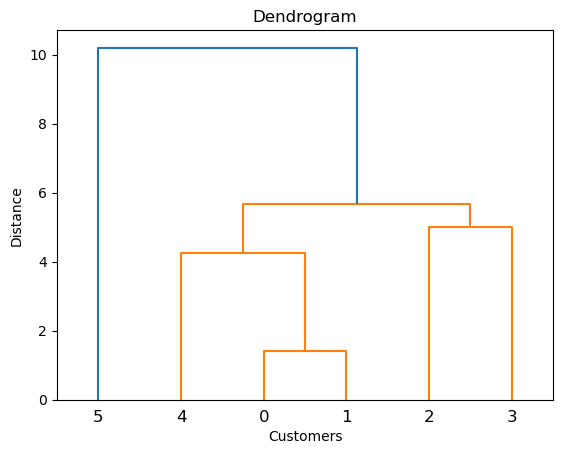

In [37]:
import matplotlib.pyplot as plt
dendogram=sch.dendrogram(sch.linkage(val,method='single'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [38]:
sch.linkage(X,method='single')

array([[ 48.        ,  49.        ,   0.        ,   2.        ],
       [ 65.        ,  68.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 63.        , 201.        ,   1.        ,   3.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 74.        ,  77.        ,   1.        ,   2.        ],
       [ 85.        , 209.        ,   1.        ,   3.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 76.        , 212.        ,   1.        ,   3.        ],
       [ 75.        , 213.        ,   1.        ,   4.        ],
       [ 81.        , 214

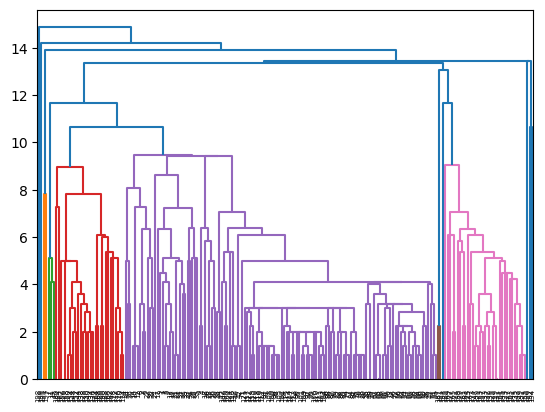

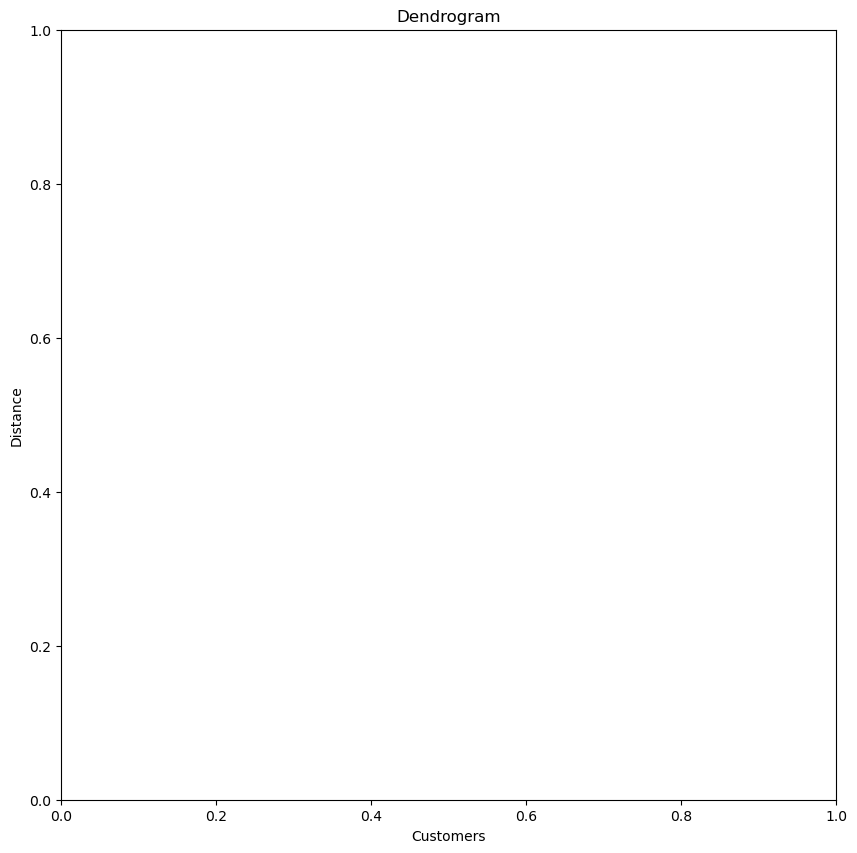

In [39]:
# Dendogram using Single
dendogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.figure(figsize=(10,10))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

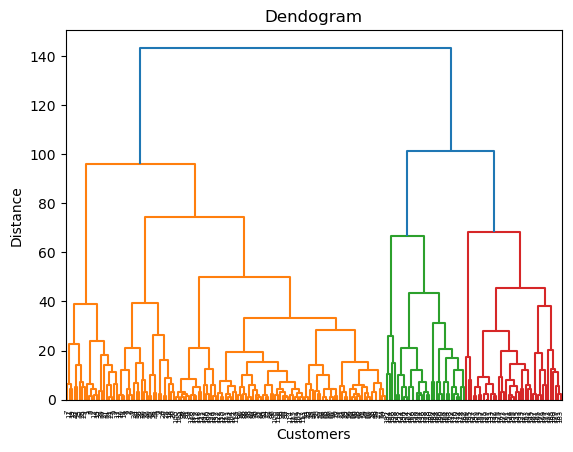

In [40]:
dendogram=sch.dendrogram(sch.linkage(X,method='complete'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

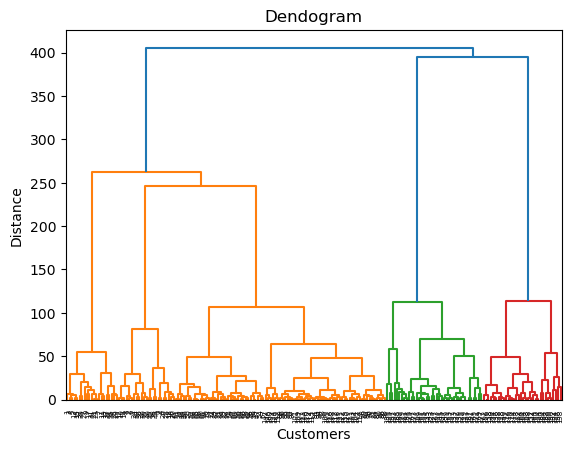

In [41]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [42]:
#method-2

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,
                           affinity='euclidean',
                           linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

# Those who are getting error affinity
# metric='euclidean'

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [43]:
y_clusters

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [ ]:
k-means ======= > 1 sample , 3rd sample ======= > 0
hch =========== > 1 sample , 3rd sample ======= > 4

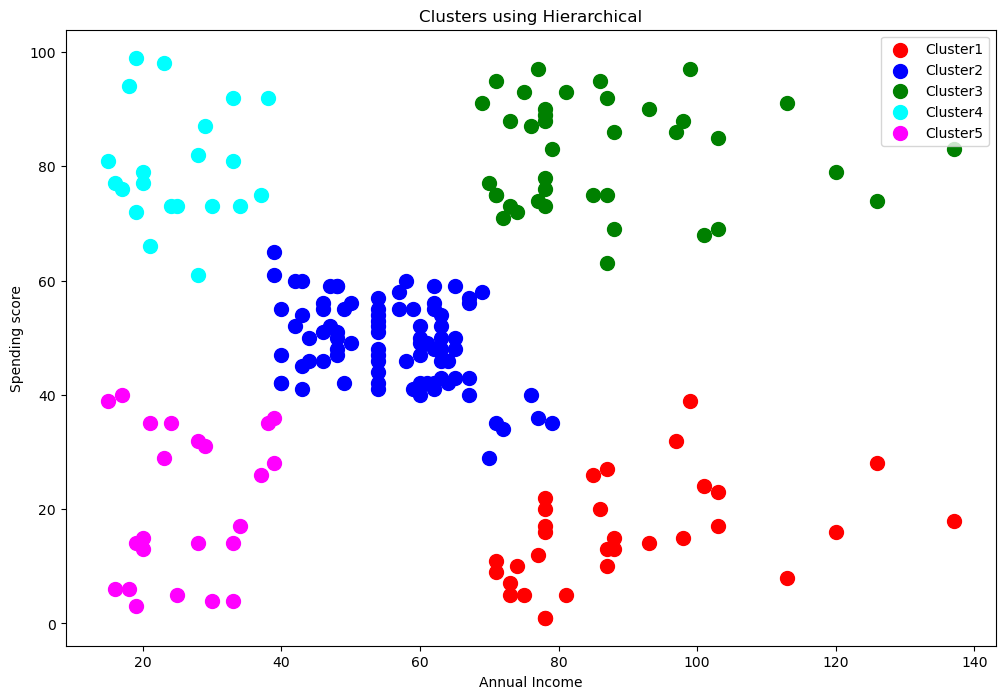

In [44]:
# Visulaize the clusters
# We are applying scatter plot between income and spending score w.r.t to clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label="Cluster5")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using Hierarchical")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()